# Project: Investigate European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
       -  <a href="#q4">How was Sporting CP performance in the last seasons?</a><br>
    -  <a href="#q5">Did Sporting perform better in the seasons the had only one coach?</a>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 
<li> How was Sporting CP performance in the last seasons?
<li> Did Sporting perform better in the seasons the had only one coach?


<a id='wrangling'></a>
## Data Wrangling



In [1]:
# Import statements for all of the packages 
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Sporting CP Data

To analyse Sporting performance, I created a csv file from a SQL query in SQLite. I wanted only the games where Sporting played and have the name of the clubs in my table, so I had to join 
The SQL query I used was the following:<br>
<br>
SELECT m.season, m.date, t1.team_long_name as home_team, t2.team_long_name AS away_team, m.home_team_goal, m.away_team_goal<br>
FROM Match m<br>
JOIN League l<br>
ON m.league_id = l.id<br>
INNER JOIN Team as t1<br>
ON m.home_team_api_id = t1.team_api_id<br>
INNER JOIN Team as t2<br>
ON m.away_team_api_id = t2.team_api_id<br>
WHERE l.name = 'Portugal Liga ZON Sagres' AND t1.team_long_name='Sporting CP' OR t2.team_long_name='Sporting CP'<br>
ORDER BY m.date ASC;<br>
<br>
I saved the result from the query as 'sporting.csv'.

In [2]:
## Read the sporting.csv file
sporting = pd.read_csv('sporting.csv')
sporting.head()

,season,date,home_team,away_team,home_team_goal,away_team_goal
0,2008/2009,2008-08-23 00:00:00,Sporting CP,Trofense,3,1
1,2008/2009,2008-09-01 00:00:00,SC Braga,Sporting CP,0,1
2,2008/2009,2008-09-20 00:00:00,Sporting CP,CF Os Belenenses,2,0
3,2008/2009,2008-09-27 00:00:00,SL Benfica,Sporting CP,2,0
4,2008/2009,2008-10-05 00:00:00,Sporting CP,FC Porto,1,2


<a id='eda'></a>
## Exploratory Data Analysis



<a id='q4'></a>
### How was Sporting CP performance in the last seasons?

As a Sporting supporter, I am interested in looking at the performance of my favourite team. In the last years, Porto and Benfica have been the favourite challengers for the Title. Is Sporting improving its performance and is it possible that in the next few years we can expect our club to be the challenging for the title?

In [3]:
# Create a new DataFrame for Sporting home matches
sporting_home = sporting.query('home_team == "Sporting CP"')
sporting_home.head()

,season,date,home_team,away_team,home_team_goal,away_team_goal
0,2008/2009,2008-08-23 00:00:00,Sporting CP,Trofense,3,1
2,2008/2009,2008-09-20 00:00:00,Sporting CP,CF Os Belenenses,2,0
4,2008/2009,2008-10-05 00:00:00,Sporting CP,FC Porto,1,2
7,2008/2009,2008-11-15 00:00:00,Sporting CP,Leixões SC,0,1
9,2008/2009,2008-11-30 00:00:00,Sporting CP,Vitória Guimarães,2,0


In [4]:
# Create a new DataFrame for Sporting away matches
sporting_away = sporting.query('away_team == "Sporting CP"')
sporting_away.head()

,season,date,home_team,away_team,home_team_goal,away_team_goal
1,2008/2009,2008-09-01 00:00:00,SC Braga,Sporting CP,0,1
3,2008/2009,2008-09-27 00:00:00,SL Benfica,Sporting CP,2,0
5,2008/2009,2008-10-26 00:00:00,FC Paços de Ferreira,Sporting CP,0,0
6,2008/2009,2008-11-01 00:00:00,Rio Ave FC,Sporting CP,0,1
8,2008/2009,2008-11-22 00:00:00,Naval 1° de Maio,Sporting CP,0,1


In [5]:
# Define 3 points for each victory, 1 point for each Draw and 0 points for each defeat on Home matches
def pts_h(sporting_home):
    if sporting_home["home_team_goal"] > sporting_home["away_team_goal"]:
        return 3
    elif sporting_home["home_team_goal"] < sporting_home["away_team_goal"]:
        return 0
    elif sporting_home["home_team_goal"] == sporting_home["away_team_goal"]:
        return 1

In [6]:
# Sum the total points earned per season on Home games
sporting_home["points_home"] = sporting_home.apply(lambda sporting_home:pts_h(sporting_home),axis = 1)
sporting_home.groupby('season').points_home.sum()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


season
2008/2009    34
2009/2010    27
2010/2011    23
2011/2012    38
2012/2013    25
2013/2014    34
2014/2015    41
2015/2016    42
Name: points_home, dtype: int64

In [7]:
# Define 3 points for each victory, 1 point for each Draw and 0 points for each defeat on Away matches
def pts_a(sporting_away):
    if sporting_away["away_team_goal"] > sporting_away["home_team_goal"]:
        return 3
    elif sporting_away["away_team_goal"] < sporting_away["home_team_goal"]:
        return 0
    elif sporting_away["home_team_goal"] == sporting_away["away_team_goal"]:
        return 1

In [8]:
# Sum the total points earned per season on Away games
sporting_away["points_away"] = sporting_away.apply(lambda sporting_away:pts_a(sporting_away),axis = 1)
sporting_away.groupby('season').points_away.sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


season
2008/2009    32
2009/2010    21
2010/2011    25
2011/2012    21
2012/2013    17
2013/2014    33
2014/2015    35
2015/2016    44
Name: points_away, dtype: int64

In [9]:
sporting_away.head()

,season,date,home_team,away_team,home_team_goal,away_team_goal,points_away
1,2008/2009,2008-09-01 00:00:00,SC Braga,Sporting CP,0,1,3
3,2008/2009,2008-09-27 00:00:00,SL Benfica,Sporting CP,2,0,0
5,2008/2009,2008-10-26 00:00:00,FC Paços de Ferreira,Sporting CP,0,0,1
6,2008/2009,2008-11-01 00:00:00,Rio Ave FC,Sporting CP,0,1,3
8,2008/2009,2008-11-22 00:00:00,Naval 1° de Maio,Sporting CP,0,1,3


In [10]:
# Combine the Home and Away tables and add a new column with the total points (Home + Away)
total_points = sporting_home.append(sporting_away, sort=False).fillna(0)
total_points['points_total'] = total_points['points_home'] + total_points['points_away']
total_points.tail()


,season,date,home_team,away_team,home_team_goal,away_team_goal,points_home,points_away,points_total
239,2015/2016,2016-03-12 00:00:00,Estoril Praia,Sporting CP,1,2,0.0,3.0,3.0
241,2015/2016,2016-04-04 00:00:00,CF Os Belenenses,Sporting CP,2,5,0.0,3.0,3.0
243,2015/2016,2016-04-16 00:00:00,Moreirense FC,Sporting CP,0,1,0.0,3.0,3.0
245,2015/2016,2016-04-30 00:00:00,FC Porto,Sporting CP,1,3,0.0,3.0,3.0
247,2015/2016,2016-05-15 00:00:00,SC Braga,Sporting CP,0,4,0.0,3.0,3.0


In [11]:
# Total points earned in each season
sporting_points = total_points.groupby('season')['points_total'].sum();
sporting_points

season
2008/2009    66.0
2009/2010    48.0
2010/2011    48.0
2011/2012    59.0
2012/2013    42.0
2013/2014    67.0
2014/2015    76.0
2015/2016    86.0
Name: points_total, dtype: float64

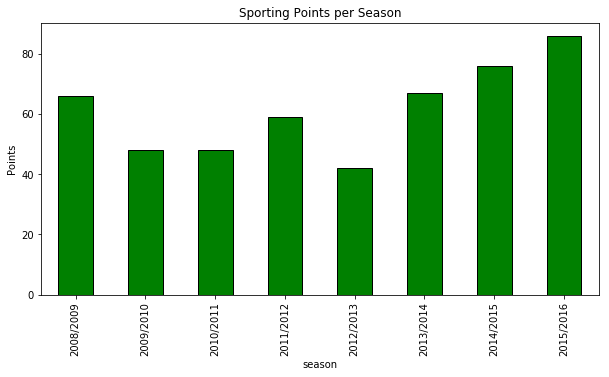

In [12]:
# Bar chart with total points per season
sporting_points.plot(kind="bar", figsize = (10,5), edgecolor = "k", colormap="ocean", title="Sporting Points per Season")
plt.ylabel('Points');

The Portuguese League had 30 stages until 2013/2014 and since 2014/2015 the number of stages was 34. In order to compare the performance, I divided the number of points by the number of matches played.

In [13]:
# Average points per match
avg_match=total_points.groupby('season')['points_total'].sum()/total_points.groupby('season')['points_total'].count()
avg_match

season
2008/2009    2.200000
2009/2010    1.600000
2010/2011    1.600000
2011/2012    1.966667
2012/2013    1.400000
2013/2014    2.233333
2014/2015    2.235294
2015/2016    2.529412
Name: points_total, dtype: float64

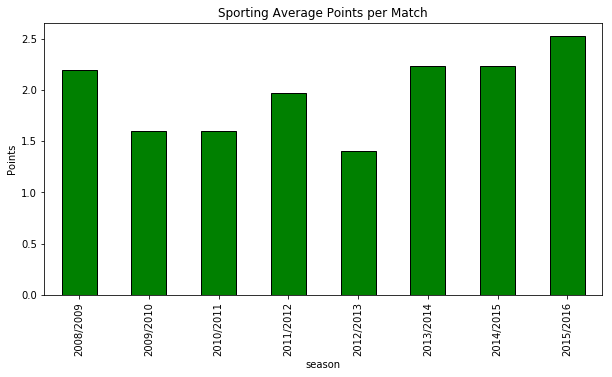

In [14]:
# Bar chart with average points per match per season
avg_match.plot(kind="bar", figsize = (10,5), edgecolor = "k", colormap="ocean", title="Sporting Average Points per Match")
plt.ylabel('Points');

<a id='q5'></a>
### Did Sporting perform better in the seasons the had only one coach?

Stability is the key to success. For some years, Sporting could not keep the same coach throughout the season. The players constantly had to adapt to new methods and strategies every time a new coach was hired.<br>
Is it evident in the data that the best seasons of the team were the ones where the coach was the same throughout the season?

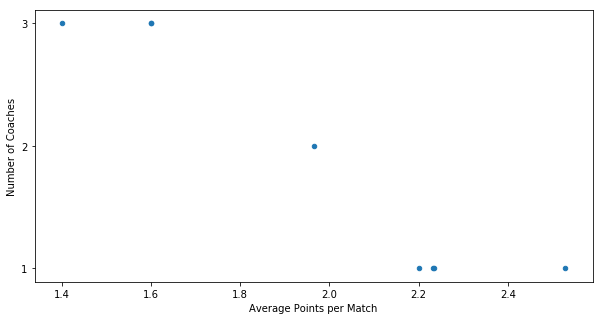

In [15]:
df = pd.DataFrame(avg_match)
df['coaches_nr'] = [1,3,3,2,3,1,1,1]
df.plot(kind="scatter", x='points_total', y='coaches_nr', figsize=(10,5))
plt.yticks(np.arange(1, 4, step=1))
plt.xlabel('Average Points per Match')
plt.ylabel('Number of Coaches');


<a id='conclusions'></a>
## Conclusions


### How was Sporting CP performance in the last seasons?
Sporting supporters never lose faith, but in the past years the team did not achieve the most desired trophy: the league championship title!<br>
Is there a trend that shows some improvement and give the supporters some hope that Sporting will be a serious title challenger?<br>
The chart with the total point earned each season show that the team had a better performance in the last two years.<br>
The Portuguese league increased the number of teams in 2014/2015 to 18, so in order to correctly compare the data, the average of points earned by game was calculated. After this last action, the trend is the same: there is a better performance in the last years, but while in the total points chart the performance in 2013/2014 seemed to be considerably lower than in 2014/2015, after applying the correction factor we can verify that both seasons were very alike.<br>

### Did Sporting perform better in the seasons the had only one coach?

Coaches need to show results. In professional football, there is no mercy: if the team does not perform, the coach gets fired.<br>
Experts know that stability is the key to success. Sir Alex Furguson was Man United coach for many years and during that period Man U was one of the top teams in Europe.<br>
The data with the number of coaches Sporting had each season was not available in the database, but a quick google search allowed me to easily gather the data for the eight seasons of this study.<br>
The scatterplot chart clearly shows a negative correlation between the number of coaches in each season and the team's performance.<br>
A correlation does not necessarly mean causation. It is most probale that the change of coach was motivated by the team's poor results that the poor results being a consequence of the change. Nevertheless, there is no doubt (according to the  data) that the best seasons were the ones where the team had the same coach throughout the season.